Text(0, 0.5, 'Amplitude')

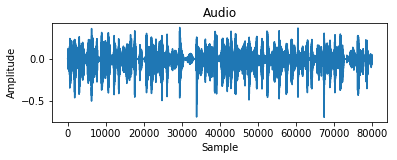

In [1]:
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import string
import pandas as pd
import glob 
import os
import random
import librosa
import IPython
import librosa.display
import cv2
#import the pyplot and wavfile modules 

import matplotlib.pyplot as plot
from scipy.io import wavfile

# Read the wav file (mono)
file_name = os.path.join("SSPNet-Speaker-Personality-Corpus/Audio_clips", 'cut_feb0101-guest-0-2' + '.wav')
signalData, samplingFrequency = librosa.load(file_name, res_type='kaiser_fast',sr=8000,mono=True) 

# Plot the signal read from wav file

plot.subplot(211)
plot.title('Audio')
plot.plot(signalData)
plot.xlabel('Sample')
plot.ylabel('Amplitude')



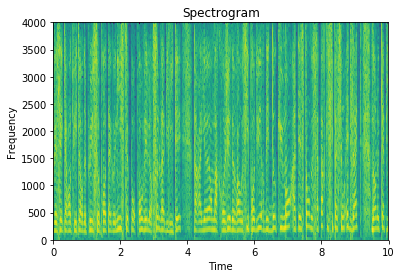

In [2]:
plot.specgram(signalData,Fs=samplingFrequency)
plot.title('Spectrogram')
plot.xlabel('Time')
plot.ylabel('Frequency')
plot.show()
IPython.display.Audio(file_name)

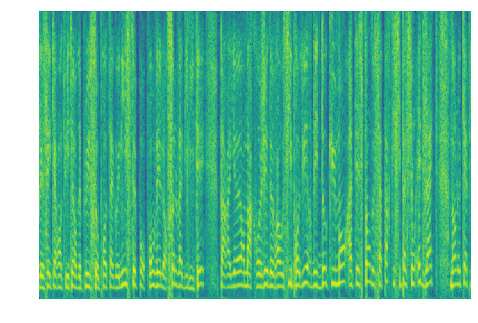

In [3]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np

def graph_spectrogram(wav_file):
    rate, data = wavfile.read(file_name)
    fig,ax = plt.subplots(1)
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
    ax.axis('off')
    pxx, freqs, bins, im = ax.specgram(x=data, Fs=rate, noverlap=384, NFFT=512)
    ax.axis('off')
    fig.savefig('sp_xyz.png', dpi=300, frameon='false')

if __name__ == '__main__':
    graph_spectrogram('file_name')

In [4]:
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
rgb_img = imread('sp_xyz.png')
gray_img = cv2.imread('sp_xyz.png', cv2.IMREAD_GRAYSCALE)
# Now normalize gray image
norm_image = cv2.normalize(gray_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

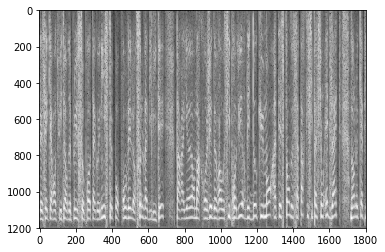

In [5]:
plt.imshow(norm_image, cmap='gray')

In [6]:
from sklearn.feature_extraction import image
# Use the array data from the first image in this dataset:
print('Image shape: {}'.format(norm_image.shape))
patches = image.extract_patches_2d(norm_image, (50, 50), max_patches=0.5)
print('Patches shape: {}'.format(patches.shape))

Image shape: (1200, 1800)
Patches shape: (1007700, 50, 50)


In [7]:
d=patches[10].ravel()
print(d.shape)
d=d.reshape(20,125)

(2500,)


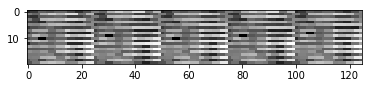

In [8]:
plt.imshow(d, cmap='gray')

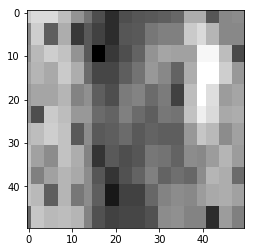

In [9]:
plt.imshow(patches[100], cmap='gray')

In [12]:
path = 'SSPNet-Speaker-Personality-Corpus/Audio_clips'
files = [f for f in glob.glob(path + "**/*.wav", recursive=True)]

for f in files:
    print(f)

SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb2302-human-4.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0303-human-15.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0103-guest-4-17.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0403-human-16.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0905-human-9.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb1802-human-14.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb1604-human-15.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb1404-guest-5-20.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb2403-human-22.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0904-guest-4-21.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb2404-human-22.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb2805-guest-1-14.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb1603-guest-1-4.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb1405-guest-1-6.wa

Automatically created module for IPython interactive environment
Learning the dictionary... 
Partial fit of  100 out of 2400
Partial fit of  200 out of 2400
[MiniBatchKMeans] Reassigning 16 cluster centers.
Partial fit of  300 out of 2400
Partial fit of  400 out of 2400
Partial fit of  500 out of 2400
Partial fit of  600 out of 2400
Partial fit of  700 out of 2400
Partial fit of  800 out of 2400
Partial fit of  900 out of 2400
Partial fit of 1000 out of 2400
Partial fit of 1100 out of 2400
Partial fit of 1200 out of 2400
Partial fit of 1300 out of 2400
Partial fit of 1400 out of 2400
Partial fit of 1500 out of 2400
Partial fit of 1600 out of 2400
Partial fit of 1700 out of 2400
Partial fit of 1800 out of 2400
Partial fit of 1900 out of 2400
Partial fit of 2000 out of 2400
Partial fit of 2100 out of 2400
Partial fit of 2200 out of 2400
Partial fit of 2300 out of 2400
Partial fit of 2400 out of 2400
done in 3.84s.


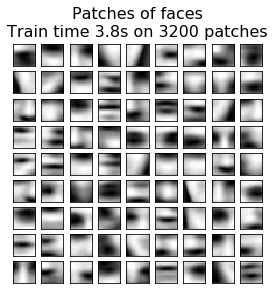

In [10]:
print(__doc__)

import time

import matplotlib.pyplot as plt
import numpy as np


from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

faces = datasets.fetch_olivetti_faces()

# #############################################################################
# Learn the dictionary of images

print('Learning the dictionary... ')
rng = np.random.RandomState(0)
kmeans = MiniBatchKMeans(n_clusters=81, random_state=rng, verbose=True)
patch_size = (20, 20)

buffer = []
t0 = time.time()

# The online learning part: cycle over the whole dataset 6 times
index = 0
for _ in range(6):
    for img in faces.images:
        data = extract_patches_2d(img, patch_size, max_patches=50,
                                  random_state=rng)
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        if index % 10 == 0:
            data = np.concatenate(buffer, axis=0)
            data -= np.mean(data, axis=0)
            data /= np.std(data, axis=0)
            kmeans.partial_fit(data)
            buffer = []
        if index % 100 == 0:
            print('Partial fit of %4i out of %i'
                  % (index, 6 * len(faces.images)))

dt = time.time() - t0
print('done in %.2fs.' % dt)

# #############################################################################
# Plot the results
plt.figure(figsize=(4.2, 4))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())


plt.suptitle('Patches of faces\nTrain time %.1fs on %d patches' %
             (dt, 8 * len(faces.images)), fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  15.,
         30.,   0.,   0.,  12.,  39.,   0.,  69.,  42.,   0.,  15.,  27.,
         23.,   0.,  27.,  54.,  39.,   0.,  48.,  24.,   0.,  83.,  45.,
         57.,   0., 124.,  33.,  44.,   0.,  69., 108.,   0.,  30., 162.,
          0.,   0., 100.,  67.,   0., 

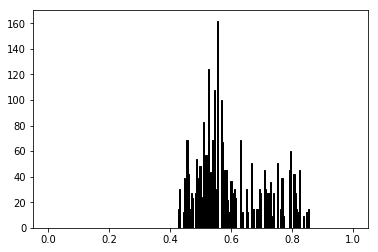

In [11]:
plt.hist(patches[107].ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k') #calculating histogram

In [ ]:
## Live Demo